In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [4]:
from pathlib import Path

path = Path(r"C:\Users\paivi\Downloads\UTKFace")
filenames = [file.name for file in path.glob('*.jpg')]


In [5]:
print(len(filenames))
print(filenames[:3])

11171
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


In [6]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [8]:
image_path


['26_0_2_20161219191301043.jpg.chip.jpg',
 '26_0_0_20170117173447156.jpg.chip.jpg',
 '30_0_0_20170117000350509.jpg.chip.jpg',
 '28_0_3_20170117120959404.jpg.chip.jpg',
 '26_1_0_20170117091325822.jpg.chip.jpg',
 '10_0_0_20170110221714752.jpg.chip.jpg',
 '15_1_4_20170103230530985.jpg.chip.jpg',
 '21_1_0_20170116220220347.jpg.chip.jpg',
 '27_1_2_20170116163747003.jpg.chip.jpg',
 '29_1_0_20170117130620465.jpg.chip.jpg',
 '24_1_2_20170116165442037.jpg.chip.jpg',
 '1_1_0_20170109192402736.jpg.chip.jpg',
 '20_1_1_20170105002448621.jpg.chip.jpg',
 '26_0_0_20170116193316697.jpg.chip.jpg',
 '26_1_1_20170112235923687.jpg.chip.jpg',
 '1_0_2_20161219201523620.jpg.chip.jpg',
 '26_0_1_20170116204830651.jpg.chip.jpg',
 '26_0_1_20170116193423469.jpg.chip.jpg',
 '10_1_0_20170109203501969.jpg.chip.jpg',
 '29_0_3_20170117180817266.jpg.chip.jpg',
 '25_0_1_20170117195252189.jpg.chip.jpg',
 '30_1_2_20170116163322535.jpg.chip.jpg',
 '16_1_0_20170109204530608.jpg.chip.jpg',
 '26_1_2_20170116175849328.jpg.chip.

In [7]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels


In [9]:
df.head()


,image,age,gender
0,26_0_2_20161219191301043.jpg.chip.jpg,26,0
1,26_0_0_20170117173447156.jpg.chip.jpg,26,0
2,30_0_0_20170117000350509.jpg.chip.jpg,30,0
3,28_0_3_20170117120959404.jpg.chip.jpg,28,0
4,26_1_0_20170117091325822.jpg.chip.jpg,26,1


In [10]:
gender_dict = {0:"Male",1:"Female"}

In [11]:
df = df.astype({'age':'float32', 'gender': 'int32'})


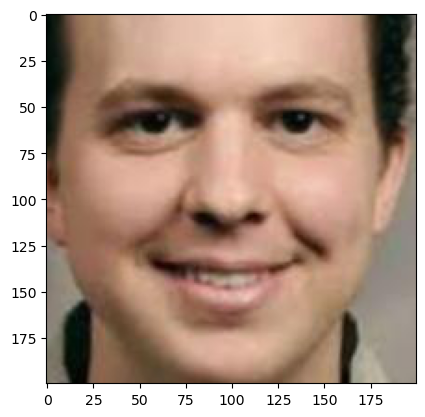

In [21]:
img = Image.open(r"C:\Users\paivi\Downloads\UTKFace/"+df.image[2])
plt.imshow(img)


C:\Users\paivi\AppData\Local\Temp\ipykernel_19388\2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

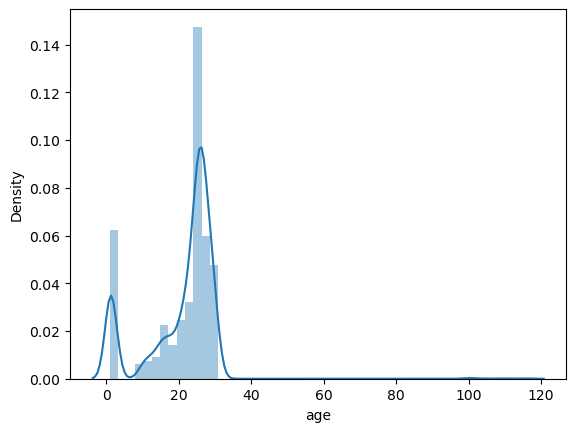

In [22]:
sns.distplot(df.age)

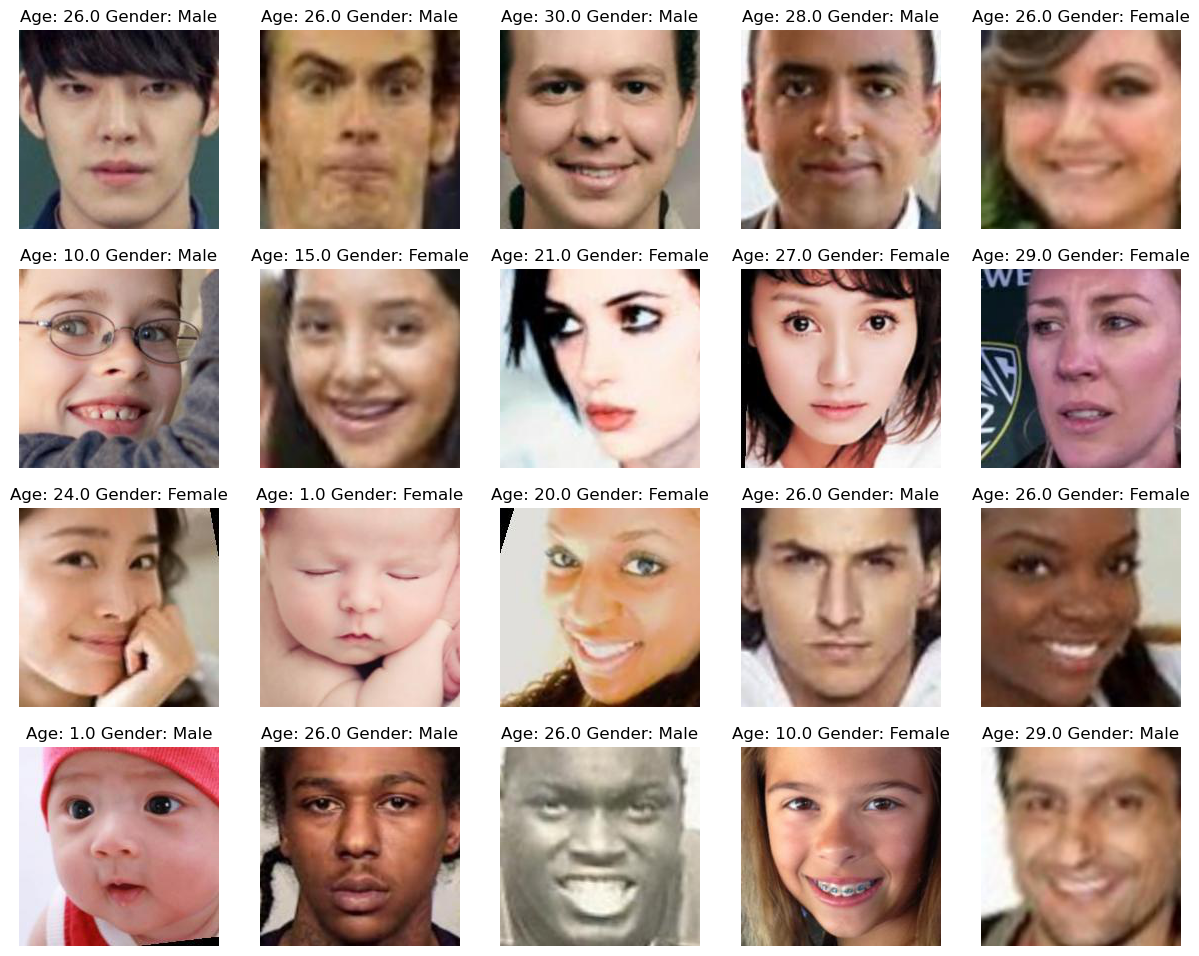

In [26]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img(r"C:\Users\paivi\Downloads\UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [27]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [28]:
train.head()


,image,age,gender
3144,28_0_0_20170105164855636.jpg.chip.jpg,28.0,0
6917,26_0_1_20170104230506569.jpg.chip.jpg,26.0,0
2056,14_1_3_20170104221901782.jpg.chip.jpg,14.0,1
1925,28_0_0_20170113132725104.jpg.chip.jpg,28.0,0
634,24_1_1_20170112204645764.jpg.chip.jpg,24.0,1


In [30]:
x_train = []
for file in train.image:
    img = load_img(r"C:\Users\paivi\Downloads\UTKFace/"+file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

C:\Users\paivi\AppData\Local\Temp\ipykernel_19388\3798088148.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [31]:
x_train.shape

(1675, 128, 128, 1)

In [32]:
x_train = x_train/255

In [33]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [34]:
input_size = (128,128,1)


In [35]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [36]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])


In [37]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 126, 126, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)           0         ['batch_normalization[0][0

In [38]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20


151/151 [==============================] - 73s 442ms/step - loss: 9.0101 - gender_output_loss: 0.7291 - age_output_loss: 8.2810 - gender_output_accuracy: 0.6151 - age_output_accuracy: 0.1095 - val_loss: 20.3135 - val_gender_output_loss: 0.6712 - val_age_output_loss: 19.6423 - val_gender_output_accuracy: 0.7381 - val_age_output_accuracy: 0.0714
Epoch 2/20
151/151 [==============================] - 70s 466ms/step - loss: 7.1272 - gender_output_loss: 0.5308 - age_output_loss: 6.5963 - gender_output_accuracy: 0.7359 - age_output_accuracy: 0.0942 - val_loss: 17.3828 - val_gender_output_loss: 0.6300 - val_age_output_loss: 16.7528 - val_gender_output_accuracy: 0.7262 - val_age_output_accuracy: 0.0714
Epoch 3/20
151/151 [==============================] - 61s 407ms/step - loss: 5.9358 - gender_output_loss: 0.4673 - age_output_loss: 5.4685 - gender_output_accuracy: 0.7578 - age_output_accuracy: 0.0770 - val_loss: 12.7753 - val_gender_output_loss: 0.5432 - val_age_output_loss: 12.232

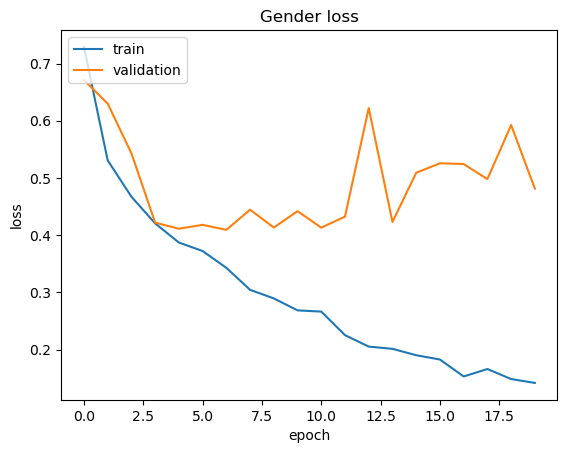

In [39]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

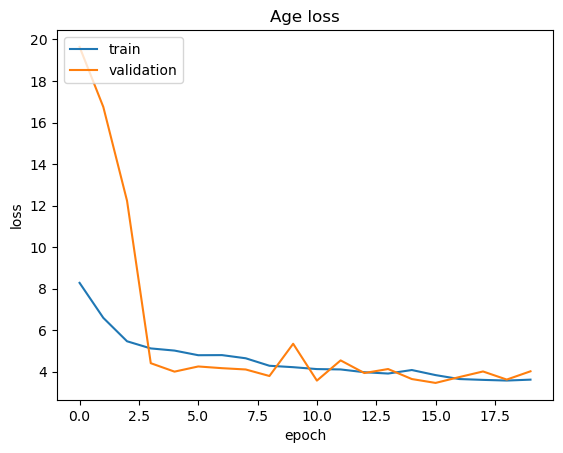

In [40]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Original: Gender =  Male  Age =  26.0
1/1 [==============================] - 0s 489ms/step
Prediction: Gender =  Male  Age =  25


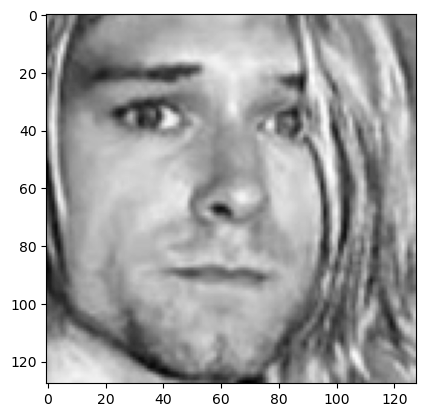

In [41]:
index=50
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Female  Age =  21.0
1/1 [==============================] - 0s 60ms/step
Prediction: Gender =  Female  Age =  18


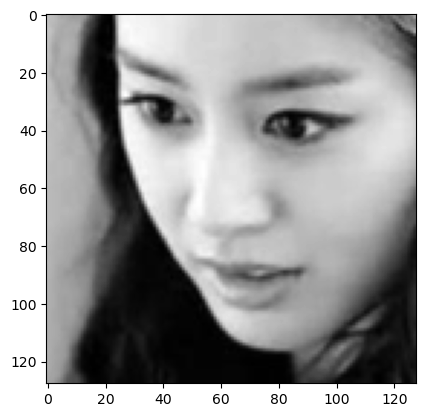

In [42]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')